In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, median_abs_deviation

In [68]:
df = pd.read_csv("Salary_Data.csv", encoding="latin1")

In [69]:
df

,ï»¿Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [70]:
cols = df.columns.tolist()
cols[0] = "Age"
df.columns = cols  

In [71]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [73]:
df = df.dropna(how="all")  

In [74]:
col = "Salary"
data = df[col]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (data >= lower_bound) & (data <= upper_bound)
cleaned_df = df[mask].copy()
cleaned_data = cleaned_df[col]

In [75]:
stats_dict = {
    "mean": cleaned_data.mean(),
    "trimmed_mean_10%": trim_mean(cleaned_data, 0.1),
    "median": cleaned_data.median(),
    "variance": cleaned_data.var(),
    "std_dev": cleaned_data.std(),
    "mean_abs_dev": np.mean(np.abs(cleaned_data - cleaned_data.mean())),
    "median_abs_dev": median_abs_deviation(cleaned_data, scale=1)
}

print("Статистики:")
for k, v in stats_dict.items():
    print(f"  {k}: {v}")

Статистики:
  mean: 115326.96477086132
  trimmed_mean_10%: 115167.44823726917
  median: 115000.0
  variance: 2786381211.852442
  std_dev: 52786.183910682936
  mean_abs_dev: 45739.76706511262
  median_abs_dev: 45000.0


In [76]:
df['salary_minmax'] = (df['Salary'] - df['Salary'].min()) / \
                      (df['Salary'].max() - df['Salary'].min())

df['salary_zscore'] = (df['Salary'] - df['Salary'].mean()) / \
                      df['Salary'].std()
df

/tmp/ipykernel_14983/1695769275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_minmax'] = (df['Salary'] - df['Salary'].min()) / \
/tmp/ipykernel_14983/1695769275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary_zscore'] = (df['Salary'] - df['Salary'].mean()) / \


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,salary_minmax,salary_zscore
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0.359103,-0.479803
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0.258963,-0.953412
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,0.599439,0.656858
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0.238935,-1.048133
4,52.0,Male,Master's,Director,20.0,200000.0,0.799720,1.604076
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,0.799720,1.604076
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0.198878,-1.237577
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,0.218906,-1.142855
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,0.559383,0.467415


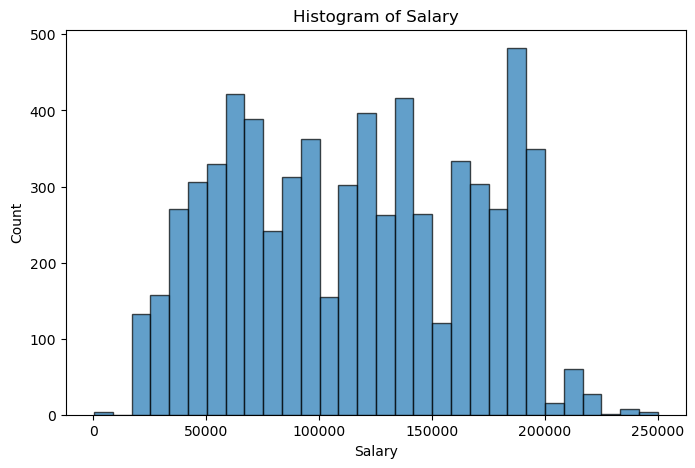

In [77]:
# Гістограма
plt.figure(figsize=(8,5))
plt.hist(cleaned_data, bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.savefig("histogram_salary.png")
plt.show()
plt.close()

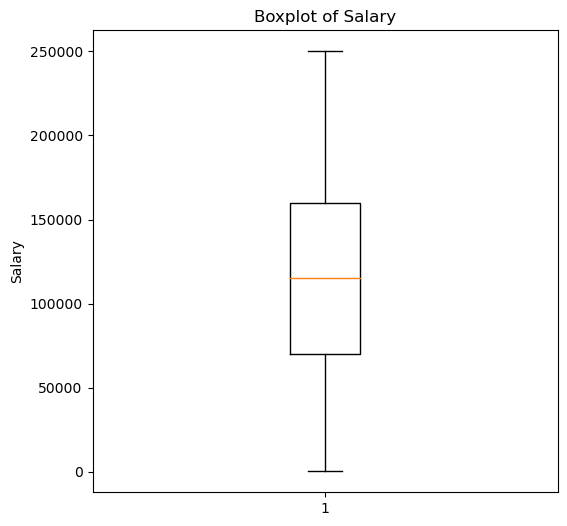

In [78]:
# Boxplot
plt.figure(figsize=(6,6))
plt.boxplot(cleaned_data, vert=True)
plt.title("Boxplot of Salary")
plt.ylabel("Salary")
plt.savefig("boxplot_salary.png")
plt.show()
plt.close()

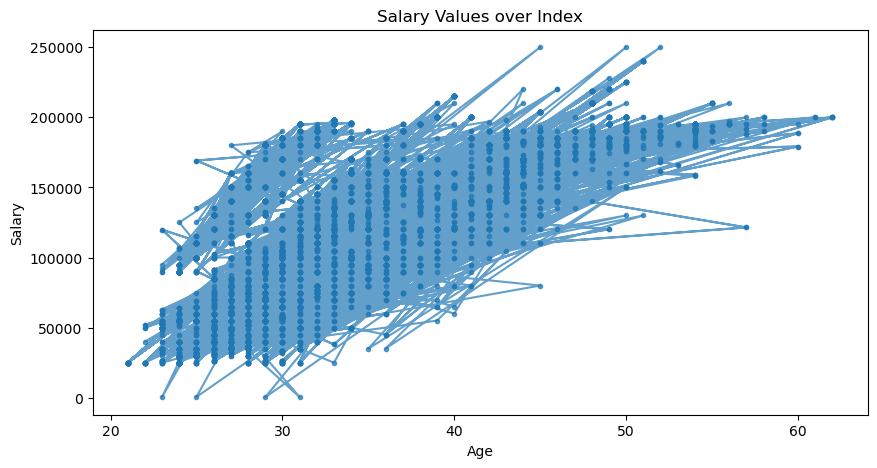

In [79]:
# Лінійний графік по індексу
plt.figure(figsize=(10,5))
plt.plot(cleaned_df['Age'], cleaned_df['Salary'], marker=".", linestyle="-", alpha=0.7)
plt.title("Salary Values over Index")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.savefig("line_salary.png")
plt.show()
plt.close()